# Exploring the data

### Plotting some QC spectra

First, we load the data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json as js

csv_path = "U:/Documents/20220719165546_metatags.csv" 
spectra_path = "//z-sv-dfsroot/dfsroot/project/agzigman/MIRA Anaylzer - Eval/L4L_all_samples/Serum"

data = pd.read_csv(csv_path, delimiter=",", header=0)

Subselecting all QC's from the data

In [2]:
qcs = data[data["Sample ID"]=="QC"]
qcs = qcs.reset_index()
print(len(qcs))

#qcs.to_csv('qcs.csv', index=False) 

1508


Plotting the QC-spectra

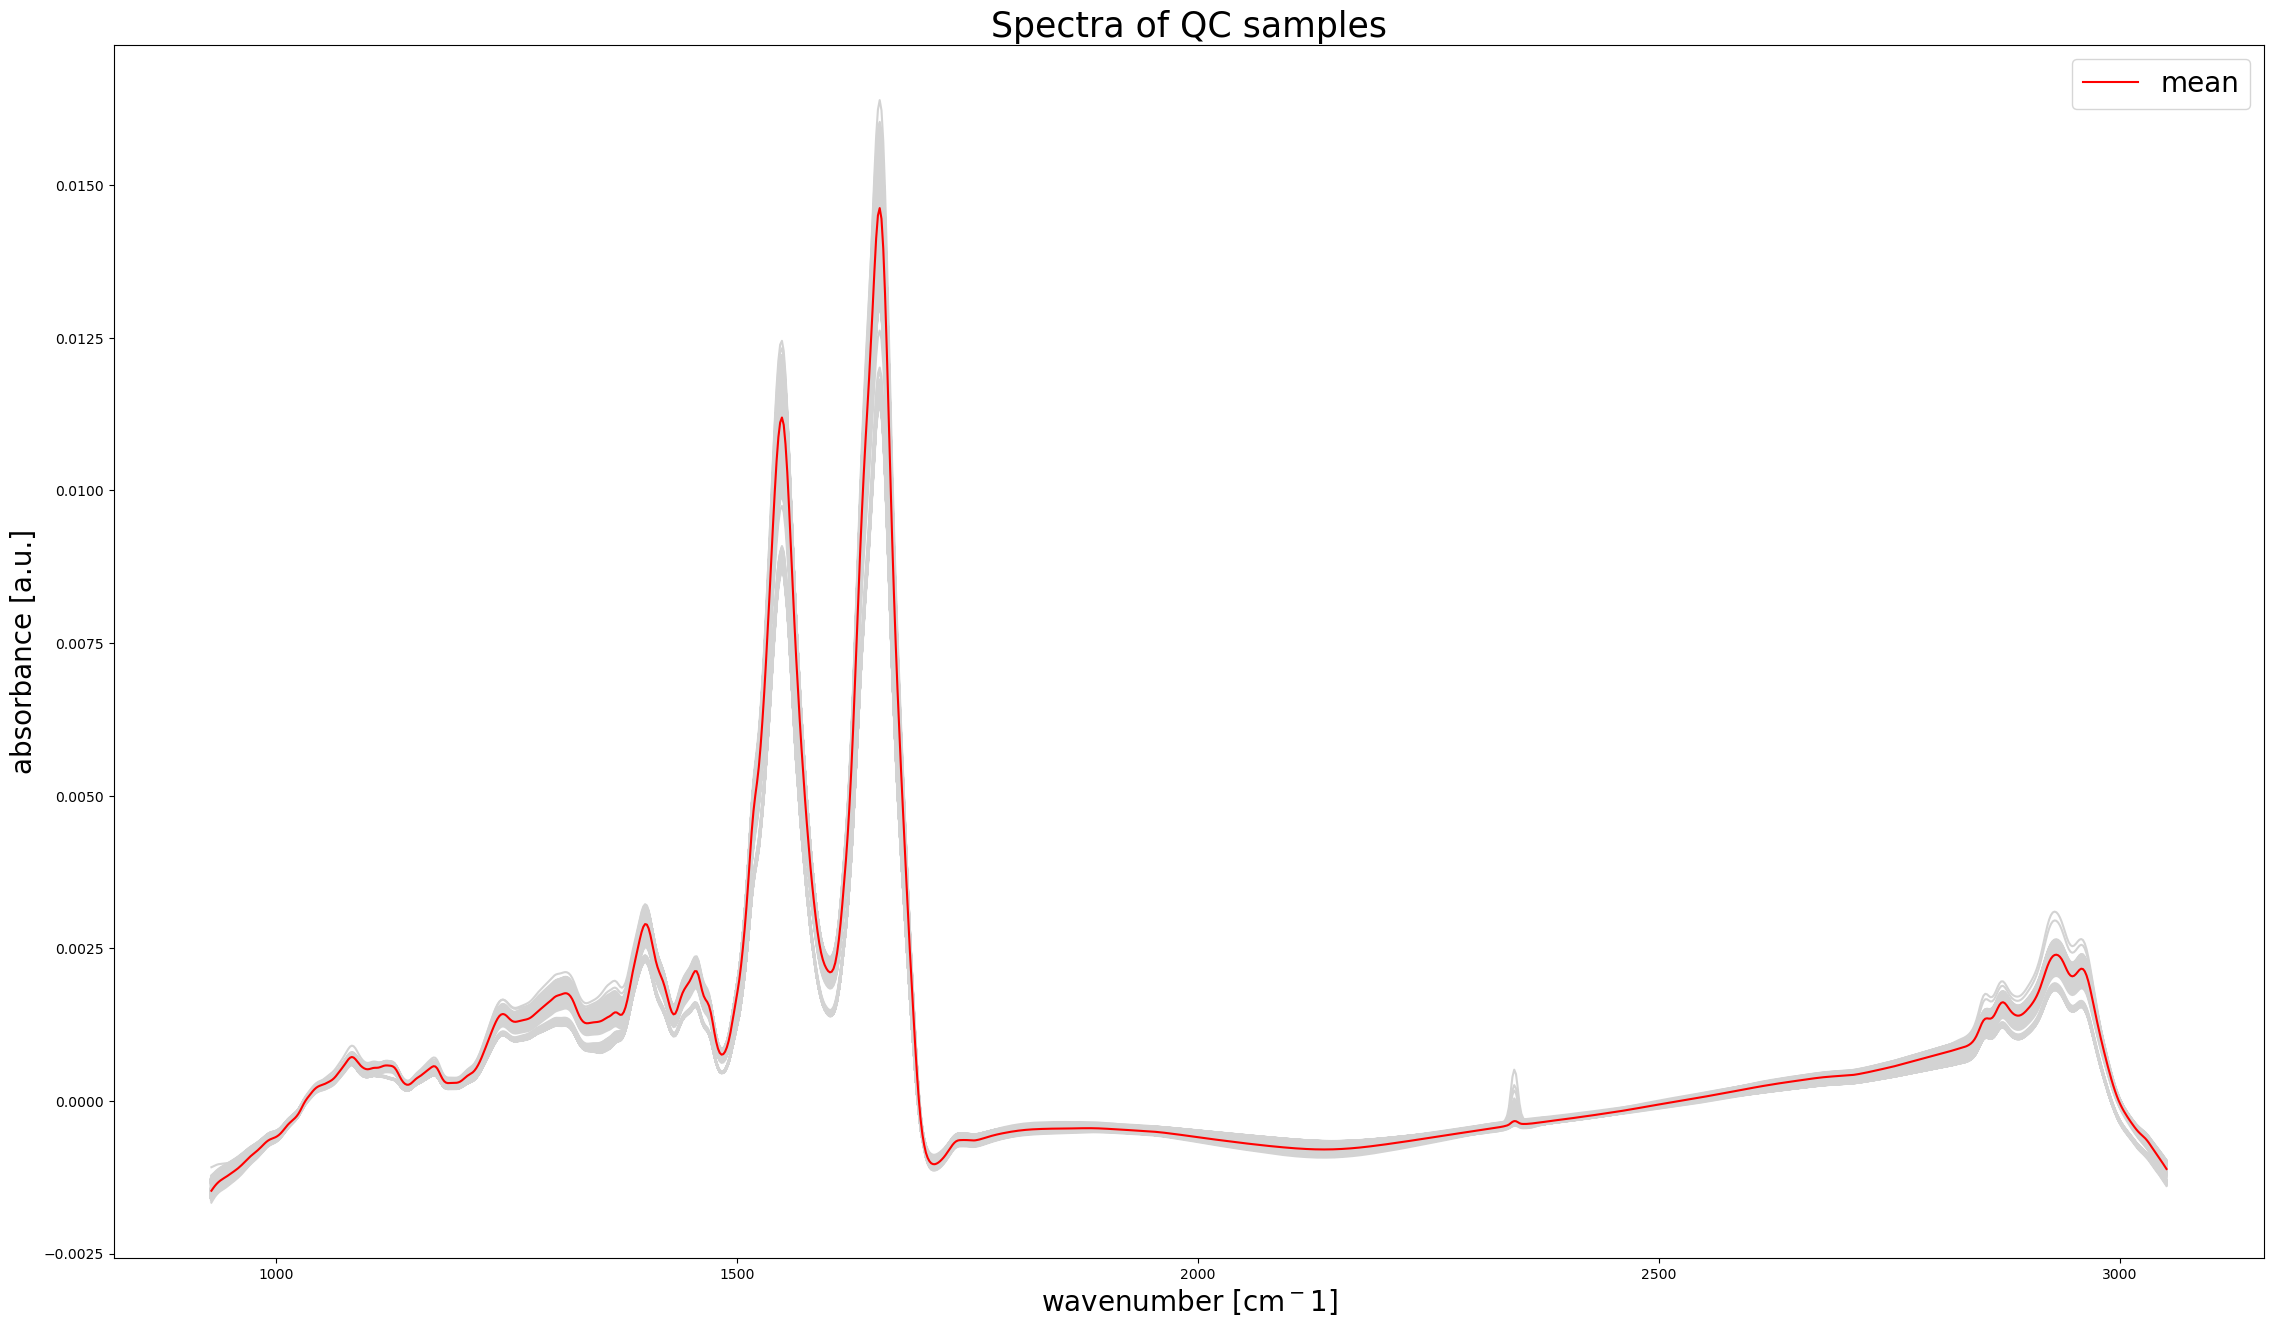

<Figure size 640x480 with 0 Axes>

In [12]:
absorbances = []

plt.figure(figsize= (18.5 * 1.5, 10.5 * 1.5))

for i in range(1, len(qcs)):
    ID = qcs["File Name"][i] + ".json"
    spectrum_path_id ="%s/%s"%(spectra_path,ID) 
    f = open(spectrum_path_id, "r")
    spect = js.loads(f.read())
    x = np.linspace(929.52720343237377,3050.8548461203636,len(spect["AB Data"]))
    ab_data = spect["AB Data"]
    ab_data = list(reversed(ab_data))
    if(sum(ab_data)>0.0025):
        plt.plot(x, ab_data, color="lightgrey")
        absorbances.append(ab_data)
    

#plt.figure(figsize= (18.5 * 2, 10.5 * 2))
    
plt.plot(x, np.mean(absorbances, axis=0), "r", label = "mean") 

plt.legend(fontsize= 20)
plt.xlabel("wavenumber [cm$^-1$]", fontsize = 20) 
plt.ylabel("absorbance [a.u.]", fontsize= 20)
plt.title("Spectra of QC samples", fontsize= 25)
plt.show()
plt.savefig("qc_spectra.png", dpi=400)

### Performing a principal component analysis on the QC's

It is recommended to apply standard scaling on the qc data before doing the PCA: 

In [18]:
from sklearn.preprocessing import StandardScaler
absorbances = StandardScaler().fit_transform(absorbances)

Having the absorbances standard scaled, we can do the PCA. There was one complete outlier, which is removed from the plot.

Text(0, 0.5, 'principal component 2')

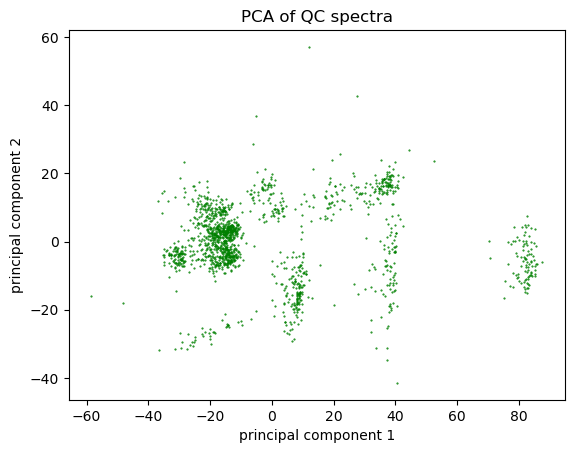

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(absorbances)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

for i in range(len(principalDf)):
    if principalDf["principal component 1"][i] > 200:
        principalDf = principalDf.drop(i)

xaxis = list(principalDf["principal component 1"])
yaxis = list(principalDf["principal component 2"])

np.savetxt("pcay.txt",xaxis)
np.savetxt("pcay.txt",yaxis)



plt.plot(xaxis, yaxis, 'go', markersize= 0.5)
plt.title("PCA of QC spectra")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")

### Performing t-SNE on the QC data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1506 samples in 0.001s...
[t-SNE] Computed neighbors for 1506 samples in 0.083s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1506
[t-SNE] Computed conditional probabilities for sample 1506 / 1506
[t-SNE] Mean sigma: 0.000231
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.390537
[t-SNE] KL divergence after 300 iterations: 0.515008


Text(0.5, 1.0, 'T-SNE of QC spectra')

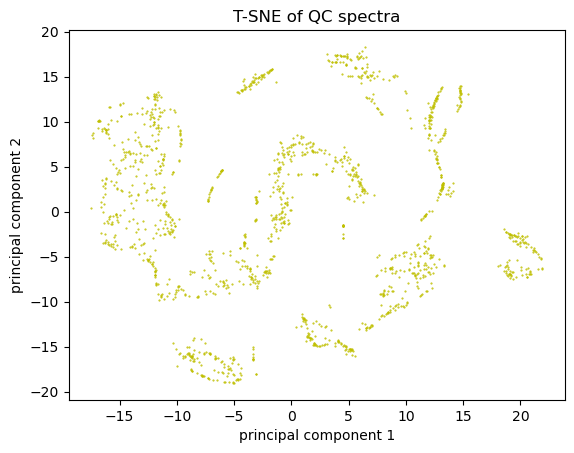

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(absorbances)

x_tsne = tsne_results[:,0]
y_tsne = tsne_results[:,1]
np.savetxt("tsnex.txt", x_tsne)
np.savetxt("tsney.txt", y_tsne)
plt.plot(x_tsne, y_tsne, "yo", markersize = 0.5)
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.title("T-SNE of QC spectra")